# In this notebook, we run an MLP model on dataset hoda and examine the results in terms of underfitting, fitting and overfitting.

## Download dataset

In [1]:
!gdown --fuzzy https://drive.google.com/file/d/1QJrQsEYOfPBn1LoIeYMZ2HFBRC0AY-6F/view?usp=sharing
!gdown --fuzzy https://drive.google.com/file/d/1zStcaVl_34RrYIfVObuM4xzB6s8xwvBi/view?usp=sharing

Downloading...
From (uriginal): https://drive.google.com/uc?id=1QJrQsEYOfPBn1LoIeYMZ2HFBRC0AY-6F
From (redirected): https://drive.google.com/uc?id=1QJrQsEYOfPBn1LoIeYMZ2HFBRC0AY-6F&confirm=t&uuid=3f57a77f-3ba5-4022-bca4-11f671c65821
To: e:\university\semestary7\Computational Inteligence\Home Work\HW2\dataset.py

  0%|          | 0.00/909 [00:00<?, ?B/s]
100%|██████████| 909/909 [00:00<00:00, 911kB/s]
Downloading...
From (uriginal): https://drive.google.com/uc?id=1zStcaVl_34RrYIfVObuM4xzB6s8xwvBi
From (redirected): https://drive.google.com/uc?id=1zStcaVl_34RrYIfVObuM4xzB6s8xwvBi&confirm=t&uuid=41d6c04c-e7f2-454b-9f0b-e8524dbe8f0b
To: e:\university\semestary7\Computational Inteligence\Home Work\HW2\Data_hoda_full.mat

  0%|          | 0.00/3.99M [00:00<?, ?B/s]
 13%|█▎        | 524k/3.99M [00:03<00:24, 139kB/s]
 26%|██▋       | 1.05M/3.99M [00:08<00:24, 119kB/s]
 39%|███▉      | 1.57M/3.99M [00:12<00:18, 129kB/s]
 53%|█████▎    | 2.10M/3.99M [00:15<00:13, 140kB/s]
 66%|██████▌   | 2.62M/

## Importing libraries

In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense,  Activation
from dataset import load_hoda

# Load dataset

In [3]:
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda()

### Converting x_train and x_test to ndarray array format and converting y_train and y_test to one-hot-encoding:
####First, we have defined a simple function that prints the dimensions, data type and information of the loaded dataset. We will print this information before and after data preprocessing to notice the changes!

In [4]:
# Preprocess input data for Keras.
x_train = np.array(x_train_original)
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
x_test = np.array(x_test_original)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

In [6]:
def print_data_info(x_train, y_train, x_test, y_test):
    #Check data Type
    print ("\ttype(x_train): {}".format(type(x_train)))
    print ("\ttype(y_train): {}".format(type(y_train)))

    #check data Shape
    print ("\tx_train.shape: {}".format(np.shape(x_train)))
    print ("\ty_train.shape: {}".format(np.shape(y_train)))
    print ("\tx_test.shape: {}".format(np.shape(x_test)))
    print ("\ty_test.shape: {}".format(np.shape(y_test)))

    #sample data
    print ("\ty_train[0]: {}".format(y_train[0]))

In [7]:
print("Before Preprocessing:")
print_data_info(x_train_original, y_train_original, x_test_original, y_test_original)
print("After Preprocessing:")
print_data_info(x_train, y_train, x_test, y_test)

Before Preprocessing:
	type(x_train): <class 'numpy.ndarray'>
	type(y_train): <class 'numpy.ndarray'>
	x_train.shape: (1000, 25)
	y_train.shape: (1000,)
	x_test.shape: (200, 25)
	y_test.shape: (200,)
	y_train[0]: 6
After Preprocessing:
	type(x_train): <class 'numpy.ndarray'>
	type(y_train): <class 'numpy.ndarray'>
	x_train.shape: (1000, 25)
	y_train.shape: (1000, 10)
	x_test.shape: (200, 25)
	y_test.shape: (200, 10)
	y_train[0]: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [9]:
# In this Create the model, input dim=25 and output dim = 10

##################################
# you code here
##################################
model = Sequential()
model.add(keras.Input(shape=(25 , )))
model.add(Dense(15 , activation='relu'))
model.add(Dense(10 , activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                390       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
Total params: 550 (2.15 KB)
Trainable params: 550 (2.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile model

In [11]:
# In this cell compile mode, set loss function and optimizer and get metrics accuracy

##################################
model.compile(optimizer='rmsprop' , loss='categorical_crossentropy' , metrics='accuracy')
##################################

## Fit model

In [12]:
MLP_model = model.fit(x_train, y_train,
          epochs=100,
          batch_size=64, validation_data=(x_test, y_test))

Epoch 1/100
16/16 [==============================] - 1s 19ms/step - loss: 2.2671 - accuracy: 0.1230 - val_loss: 2.2310 - val_accuracy: 0.1550
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 2.1940 - accuracy: 0.2180 - val_loss: 2.1771 - val_accuracy: 0.1850
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 2.1353 - accuracy: 0.2930 - val_loss: 2.1210 - val_accuracy: 0.2500
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 2.0766 - accuracy: 0.3560 - val_loss: 2.0620 - val_accuracy: 0.3450
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 2.0160 - accuracy: 0.4190 - val_loss: 1.9995 - val_accuracy: 0.4250
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 1.9509 - accuracy: 0.4620 - val_loss: 1.9330 - val_accuracy: 0.4650
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 1.8800 - accuracy: 0.5030 - val_loss: 1.8606 - val_accuracy: 0.5050
Epoch 8/100


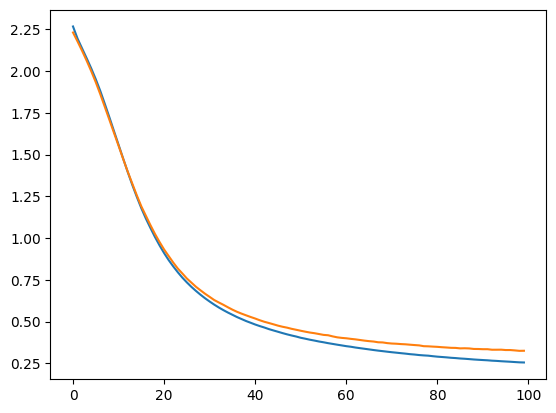

In [13]:
# plot Loss
plt.plot(MLP_model.history["loss"])
plt.plot(MLP_model.history["val_loss"])

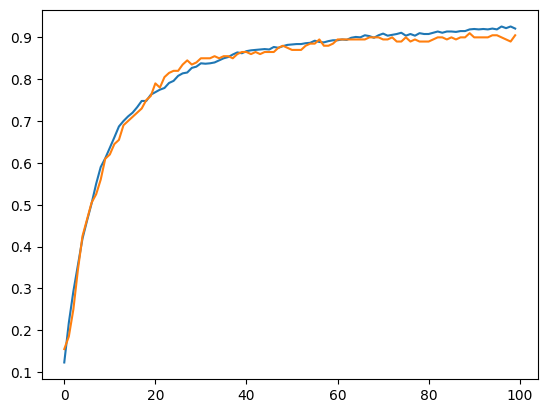

In [14]:
# plot accuracy
plt.plot(MLP_model.history["accuracy"])
plt.plot(MLP_model.history["val_accuracy"])